In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 83% 55.0M/66.0M [00:00<00:00, 168MB/s]
100% 66.0M/66.0M [00:00<00:00, 178MB/s]


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
credit_card_ds = pd.read_csv('/content/creditcard.csv')

In [11]:
credit_card_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [12]:
credit_card_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [14]:
credit_card_ds.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [17]:
credit_card_ds['Class'].value_counts()

Class
0.0    1983
1.0       2
Name: count, dtype: int64

Balancing Data Set


0 - Normal Transaction
1 - Fraudulent Transaction

In [26]:
legit = credit_card_ds[credit_card_ds.Class == 0.0]
fraud = credit_card_ds[credit_card_ds.Class == 1.0]

In [27]:
print(legit.shape)
print(fraud.shape)

(1983, 31)
(2, 31)


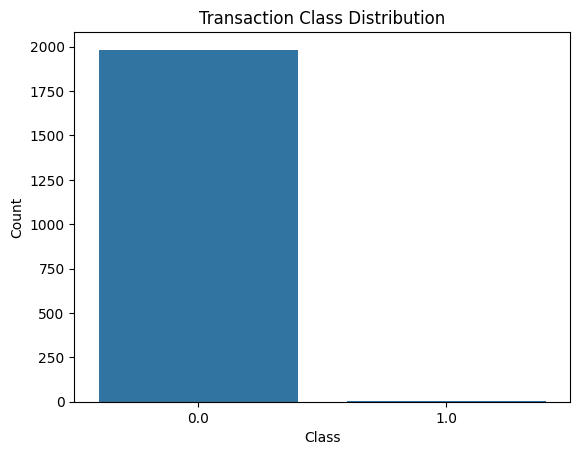

In [44]:
sns.countplot(x='Class', data=credit_card_ds)
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

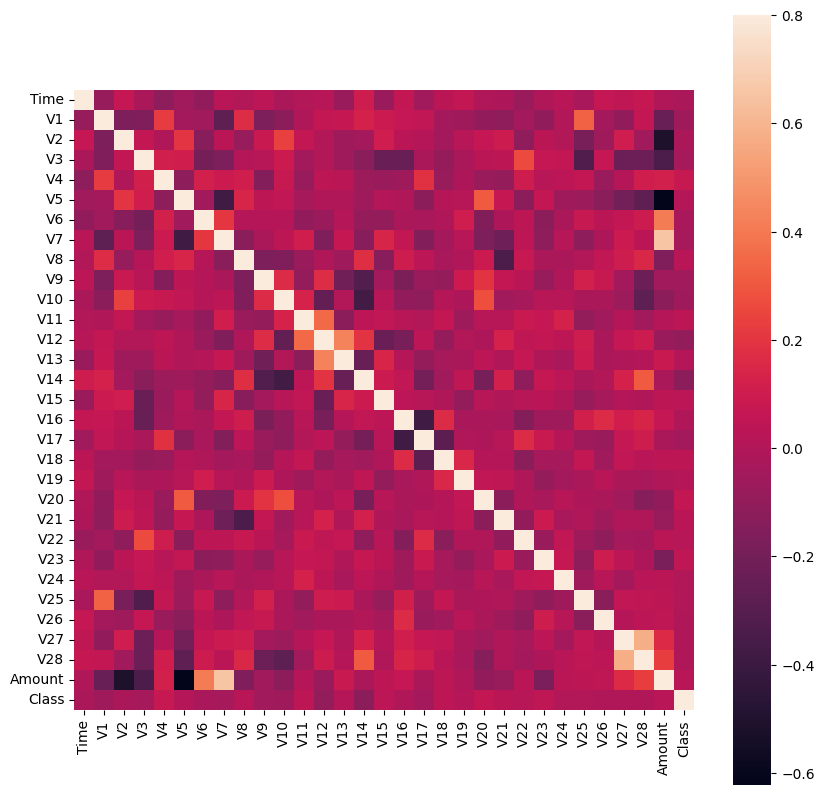

In [45]:
corrmat = credit_card_ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [47]:
len(credit_card_ds[credit_card_ds['Class']==0])

1983

In [49]:
len(credit_card_ds[credit_card_ds['Class']==1])

2

In [56]:
X = credit_card_ds.iloc[: , :-1].values
y = credit_card_ds.iloc[: , -1].values
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X, y)


In [58]:
X.shape

(1985, 30)

In [60]:
X_res.shape

(3966, 30)

In [61]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0.0: 1983, 1.0: 2})
Counter({0.0: 1983, 1.0: 1983})


In [62]:
credit_card_ds.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,760.974786,-0.281494,0.267200,0.848906,0.146804,-0.077904,0.051713,0.139533,-0.059771,0.014492,...,0.056618,-0.012217,-0.144666,-0.043548,0.013865,0.108318,0.049441,0.027220,-0.001966,68.404892
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [64]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_res , y_res , test_size=0.3 , random_state=42)

In [65]:
x_train.shape

(2776, 30)

In [69]:
y_train.shape

(2776,)

Random forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [71]:
y_pred = classifier.predict(x_test)

In [73]:
n_errors = (y_pred != y_test).sum()
n_errors

0

In [74]:
y_test.shape

(1190,)

1.0


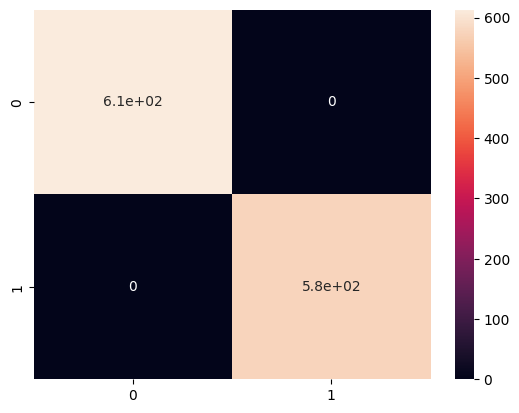

In [75]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [76]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

1.0

In [77]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

1.0

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       613
         1.0       1.00      1.00      1.00       577

    accuracy                           1.00      1190
   macro avg       1.00      1.00      1.00      1190
weighted avg       1.00      1.00      1.00      1190



Logistic Regression

In [79]:
model = LogisticRegression()

In [81]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

1.0


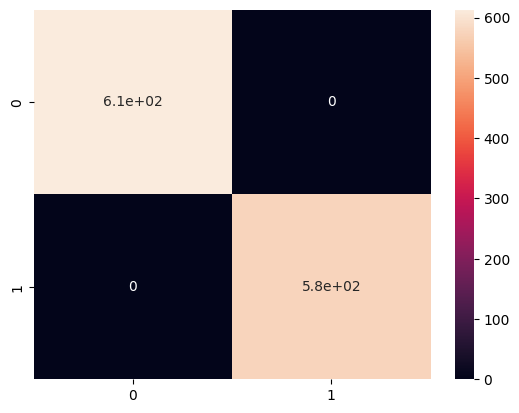

In [82]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))